# 🧬 Human Intestinal Absorption Prediction (HIA_Hou)

📖 **Dataset Description**

The `HIA_Hou` dataset is used to predict whether a chemical compound can be **absorbed in the human intestine**. This is a key aspect of early-stage **ADME profiling** in drug discovery, where high absorption is often desired for oral drugs.

The dataset includes binary labels for compounds, indicating whether they exhibit **high** or **low** intestinal absorption based on experimental data.

- **Task Type**: Binary classification  
- **Input**: SMILES string of a compound  
- **Output**: `1` (absorbed) or `0` (not absorbed)  
- **Size**: 578 compounds

---

📚 **References**

Hou, Tingjun, et al. "ADME evaluation in drug discovery. 7. Prediction of oral absorption by correlation and classification." *Journal of Chemical Information and Modeling* 47.1 (2007): 208–218.  
TDC Dataset Link: [https://tdcommons.ai/single_pred_tasks/adme/#hia_hou](https://tdcommons.ai/single_pred_tasks/adme/#hia_hou)

**License**: [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)


## 📦 Imports

In [1]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import pandas as pd
from scripts.tdc_dataset_download import TDCDatasetDownloader
from scripts.eda_utils import DatasetLoader, EDAVisualizer, SMARTSPatternAnalyzer


______

## 📥 Download AMES Dataset

In [2]:
# Declare category and dataset
category = 'adme'
dataset = 'HIA_Hou'

In [3]:
# Initiate downloader class to download the dataset
downloader = TDCDatasetDownloader(category, dataset)

Downloading...
100%|██████████| 40.1k/40.1k [00:00<00:00, 6.87MiB/s]
Loading...
Done!


✅ Dataset 'HIA_Hou' saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIA_Hou/HIA_Hou.csv'
✅ train split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIA_Hou/splits/train.csv'
✅ valid split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIA_Hou/splits/valid.csv'
✅ test split saved to '/Users/taiwoadelakin/Documents/Doc/Projects/outreachy-contributions/data/HIA_Hou/splits/test.csv'


________

## 📊 Exploratory Data Analysis

In this section, we analyze the AMES mutagenicity dataset to better understand its structure, balance, and molecular content. Exploratory Data Analysis (EDA) helps us uncover patterns, detect anomalies, and gain insights that will guide our preprocessing and modeling steps.

### 1. Load Datasets ###

In [4]:
######################################## Initialize the dataset loader ######################################## 
loader = DatasetLoader(dataset_name=dataset)

In [5]:
######################################## Load datasets ######################################## 
main_df, train_df, valid_df, test_df = loader.load_all()

🧬 HIA_Hou_main  ➡️ (578, 3)
⚗️ HIA_Hou_train ➡️ (404, 3)
🔬 HIA_Hou_valid ➡️ (58, 3)
🧪 HIA_Hou_test  ➡️ (116, 3)


______

### 2. 📦 Dataset Overview ###

Before diving into the analysis, it’s essential to understand the structure of the datasets we’re working with — including the main dataset and the train/validation/test splits.

The function `EDAVisualizer.show_dataset_info()` provides a concise summary of:
- Shape (rows × columns)
- Column names
- Missing values
- Sample preview (via `.head()`)

You can run this by:
```python
EDAVisualizer.show_dataset_info(loader)

```
Alternatively, for specific splits only e.g for just Train and Test Data:
```python
selected_datasets = ['train','test']
EDAVisualizer.show_dataset_info(loader, dataset_names=selected_datasets)



In [6]:
######################################## Show Dataset Info  ########################################

EDAVisualizer.show_dataset_info(loader)

🧬 HIA_Hou_main Info
----------------------------------------
Shape: (578, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Acetanilide,CC(=O)Nc1ccccc1,1
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1
2,Alfacalcidol,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...,1
3,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1
4,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1




⚗️ HIA_Hou_train Info
----------------------------------------
Shape: (404, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Acetanilide,CC(=O)Nc1ccccc1,1
1,Acetazolamide.mol,CC(=O)Nc1nnc(S(N)(=O)=O)s1,1
2,Aminopyrine,Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C,1
3,Amosulalol.mol,COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O,1
4,Bendroflumethiazide.mol,NS(=O)(=O)c1cc2c(cc1C(F)(F)F)N[C@H](Cc1ccccc1)...,1




🔬 HIA_Hou_valid Info
----------------------------------------
Shape: (58, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Amygdalin,N#C[C@H](O[C@@H]1O[C@@H](CO[C@@H]2O[C@@H](CO)[...,0
1,Miconazole.mol,Clc1ccc(CO[C@H](Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,1
2,Dexamethasone.mol,C[C@@H]1C[C@@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[...,1
3,Perphenazine.mol,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,1
4,Nadolol.mol,CC(C)(C)NC[C@H](O)COc1cccc2c1C[C@H](O)[C@@H](O)C2,1




🧪 HIA_Hou_test Info
----------------------------------------
Shape: (116, 3)
Columns: ['Drug_ID', 'Drug', 'Y']

Missing values:
Drug_ID    0
Drug       0
Y          0
dtype: int64

Preview:


,Drug_ID,Drug,Y
0,Mebeverine,CCN(CCCCOC(=O)c1ccc(OC)c(OC)c1)[C@@H](C)Cc1ccc...,1
1,Zanamivir.mol,CC(=O)N[C@H]1[C@@H]([C@@H](O)[C@H](O)CO)OC(C(=...,0
2,Flurazepam.mol,CCN(CC)CCN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21,1
3,Salsalate,O=C(Oc1ccccc1C(=O)O)c1ccccc1O,1
4,Desogestrel.mol,C#C[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@...,1


-----

### 3. 💎 Unique SMILES Analysis ###

Knowing how many unique compounds exist in each dataset helps:
- Measure diversity
- Avoid duplication bias
- Confirm splits are stratified

Run:
```python
EDAVisualizer.compare_unique_smiles(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Valid', 'Test'],
    smiles_col='Drug'  
)


In [7]:
######################################## Check Unique  Drug  Count in each dataset  ########################################
print(f"Number of Unique drug count in {dataset} train data is: =====>> {train_df["Drug"].nunique()}\n")
print(f"Number of Unique drug count in {dataset} validation data is: =====>> {valid_df["Drug"].nunique()}\n")
print(f"Number of Unique drug count in {dataset} test data is: =====>> {test_df["Drug"].nunique()}\n")
print(f"Total number of Unique drug count in {dataset} data is: =====>> {main_df["Drug"].nunique()}\n")

Number of Unique drug count in HIA_Hou train data is: =====>> 404

Number of Unique drug count in HIA_Hou validation data is: =====>> 58

Number of Unique drug count in HIA_Hou test data is: =====>> 116

Total number of Unique drug count in HIA_Hou data is: =====>> 578



Unique SMILES counts per dataset:
Train: 404
Valid: 58
Test: 116


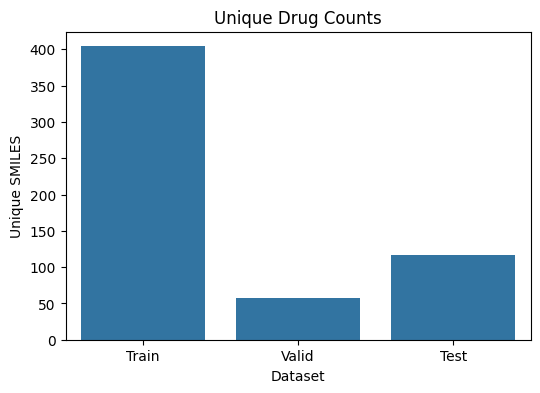

In [8]:
######################################## Compare Unique  Drug  Count Distribution  ########################################
EDAVisualizer.compare_unique_smiles(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Valid', 'Test'],
    smiles_col='Drug'  
)

_____

### 4. 🧮  Target Class Distribution in dataset ###

Class imbalance is a common challenge in classification tasks. Plotting the distribution of the target labels helps us understand:
- Whether the dataset is balanced
- The dominant class (if any)
- The need for resampling or weighted loss functions

We use:
```python
EDAVisualizer.plot_label_distribution(df)


🧮 Class Counts:
Y
1    500
0     78
Name: count, dtype: int64

📊 Class Percentages:
Y
1    86.51
0    13.49
Name: proportion, dtype: float64


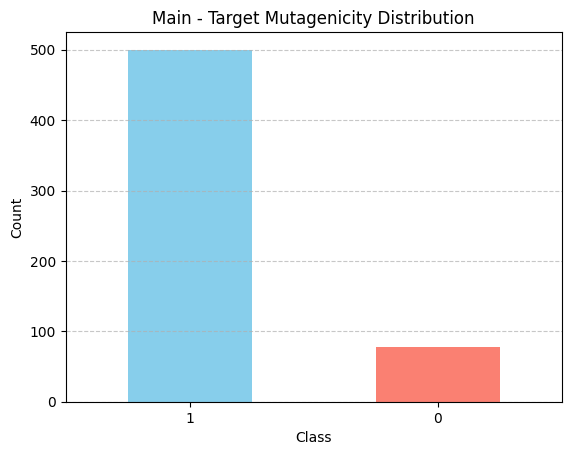

In [9]:
########################################  Plot class distribution on Main Dataset ######################################## 
EDAVisualizer.plot_label_distribution(main_df, target_col='Y', title='Main - Target Mutagenicity Distribution')

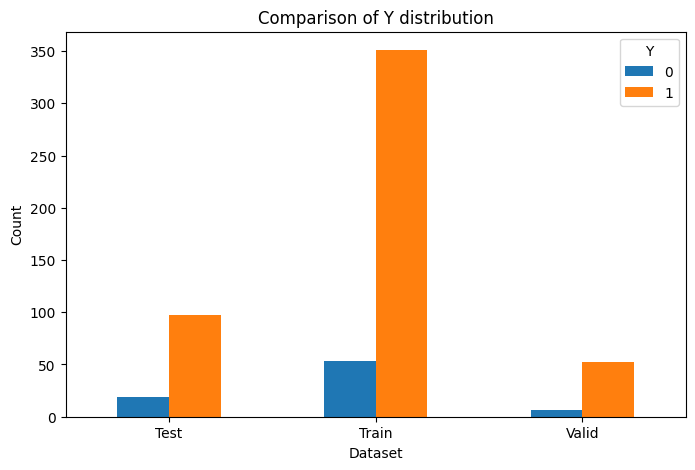


Label distribution percentages:
Y            0      1
Dataset              
Test     16.38  83.62
Train    13.12  86.88
Valid    10.34  89.66


In [10]:
########################################  Plot class distribution Comparison between Split Dataset ######################################## 
EDAVisualizer.compare_label_distributions(
    dfs=[train_df, valid_df, test_df], 
    df_names=['Train', 'Valid', 'Test'], 
    target_col='Y'
)

______

### 5. 📏 SMILES Length Analysis ###

SMILES strings vary in length depending on the molecular complexity. Analyzing their length:
- Highlights outliers or unusually long/short molecules
- Informs sequence-based model designs (like RNNs, Transformers)

To analyze the distribution:
```python
EDAVisualizer.check_smiles_length(loader=loader)


📏 SMILES Length Stats for Main:


count    578.000000
mean      47.619377
std       27.481403
min        3.000000
25%       31.000000
50%       41.000000
75%       56.000000
max      266.000000
Name: smiles_length, dtype: float64

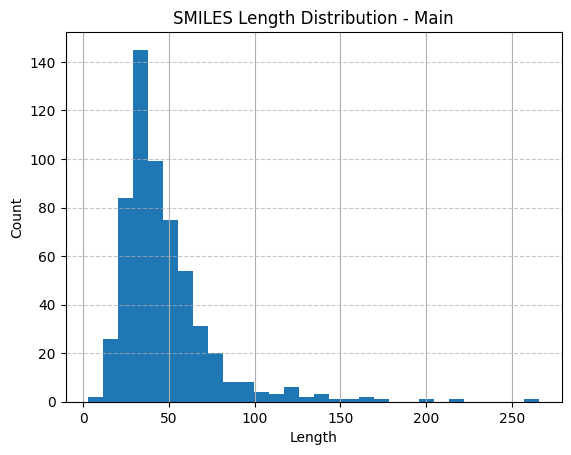

In [11]:
########################################  Check the SMILES Length Distribution of the Full Dataset ######################################## 
EDAVisualizer.check_smiles_length(loader=loader)

📏 SMILES Length Stats for Test:


count    116.000000
mean      47.232759
std       25.793278
min       13.000000
25%       31.000000
50%       41.500000
75%       56.250000
max      203.000000
Name: smiles_length, dtype: float64

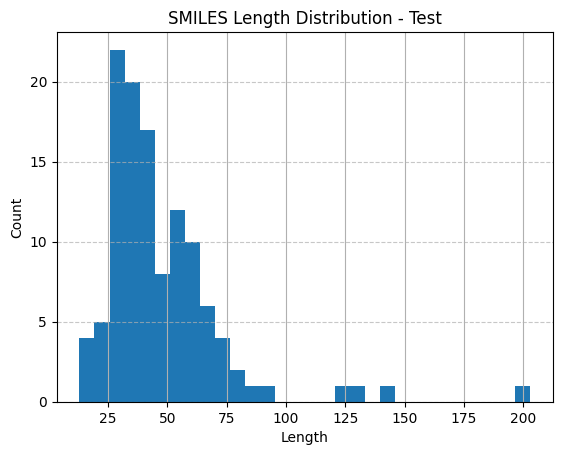

In [12]:
########################################  Alternatively, Check the SMILES Length Distribution of the Selected/Multiple Dataset Splits ######################################## 
EDAVisualizer.check_smiles_length(dfs=[test_df], names=["Test"])


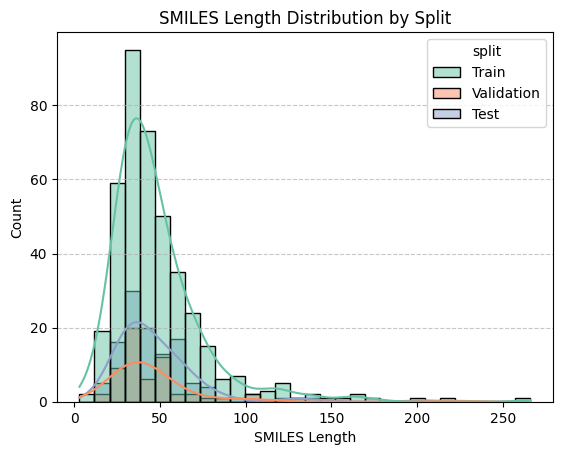

In [13]:
########################################  Compare the SMILES Length Distribution between Split Dataset ######################################## 

EDAVisualizer.compare_smiles_length(loader=loader)

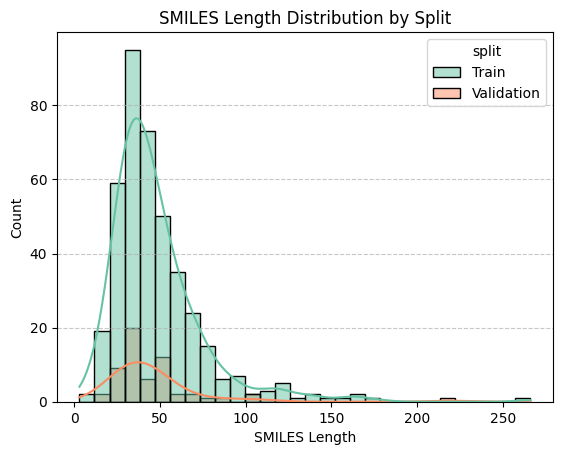

In [14]:
######################################## Alternatively, we can compare selected splits dataset by executing below ######################################## 

selected_dfs = [train_df, valid_df]
dataset_names=['Train', 'Validation']


EDAVisualizer.compare_smiles_length(selected_dfs, dataset_names)

_____________

### 5. ✔️ RDKit Molecular Validity Check ###

Not all SMILES strings are guaranteed to represent valid molecules. Some may contain syntax errors or rare patterns RDKit cannot parse.

This function evaluates validity by attempting to convert each SMILES to an RDKit Mol object:
```python
EDAVisualizer.check_molecular_validity(loader=loader)


You can also pass a different column name if your SMILES column isn’t named Drug e.g:

EDAVisualizer.check_molecular_validity(train_df, smiles_col='SMILES')

In [15]:
######################################## Check Drug Molecular Validity ######################################## 

EDAVisualizer.check_molecular_validity(loader=loader)

🧪 Validity for Main:
is_valid_mol
True    578
Name: count, dtype: int64
❗ Invalid molecules in Main: 0.00%

🧪 Validity for Train:
is_valid_mol
True    404
Name: count, dtype: int64
❗ Invalid molecules in Train: 0.00%

🧪 Validity for Validation:
is_valid_mol
True    58
Name: count, dtype: int64
❗ Invalid molecules in Validation: 0.00%

🧪 Validity for Test:
is_valid_mol
True    116
Name: count, dtype: int64
❗ Invalid molecules in Test: 0.00%



____________

### 6. 🧬 Molecular Descriptor Engineering ###
Use RDKit to calculate standard drug-likeness properties for molecules — a key step in both Exploratory Data Analysis (EDA) and featurization.

This function computes key cheminformatics descriptors from SMILES using RDKit:
- Molecular weight (MW)
- LogP (lipophilicity)
- Topological Polar Surface Area (TPSA)
- Hydrogen Bond Donors/Acceptors (HBD/HBA)
- Rotatable bonds
- Ring counts (total and aromatic)

These descriptors provide chemical insights into your dataset during EDA (e.g., distribution of molecular weights) and also serve as informative features for downstream machine learning models.

You can add descriptors to a dataset via:
```python
EDAVisualizer.add_molecular_descriptors(loader=loader)

```
You can also:

🔹 Apply to Specific DataFrames:

```python
EDAVisualizer.add_molecular_descriptors(dfs=[train_df, test_df], names=["Train", "Test"])
```

🔹 Apply to a single DataFrame:

```python
EDAVisualizer.add_molecular_descriptors(dfs=valid_df, names=["Validation"])
```

🔹 Return new DataFrames:

```python
updated = EDAVisualizer.add_molecular_descriptors(dfs=[train_df], inplace=False)

In [16]:
######################################## Add Molecular Descriptors ######################################## 
EDAVisualizer.add_molecular_descriptors(loader=loader)


🧬 Adding molecular descriptors to: Main
🧬 Adding molecular descriptors to: Train
🧬 Adding molecular descriptors to: Validation
🧬 Adding molecular descriptors to: Test


_____

### 7. ✨ SMARTS Pattern Matching ###

SMARTS patterns represent functional groups (e.g., nitro groups, amines, halogens). This module detects presence of such substructures and summarizes their occurrence by class.

**Steps**:
1. Use `SMARTSPatternAnalyzer().analyze(df)` to add SMARTS flags.
2. Use `.summarize_patterns(df)` to compare frequency by label.

Example:
```python
smarts_analyzer = SMARTSPatternAnalyzer()
train_df = smarts_analyzer.analyze(train_df)
smarts_analyzer.summarize_patterns(train_df)


In [17]:
######################################## Initialize SMARTS Pattern Analyzer ######################################## 
analyzer = SMARTSPatternAnalyzer()

In [18]:
######################################## Detect SMARTS Substructures in Main Dataset ######################################## 

data_with_flags = analyzer.analyze(main_df)

✨ SMARTS Substructure Presence by Class



,Class 0,Class 1
Hydroxyl Group,64,229
Aromatic Ring,42,416
Aromatic Amine,31,170
Carboxylic Acid,26,75
Alkene,16,109
Halogen,8,142
Sulfonamide,4,50
Alkyne,1,16
Nitro Group,0,0


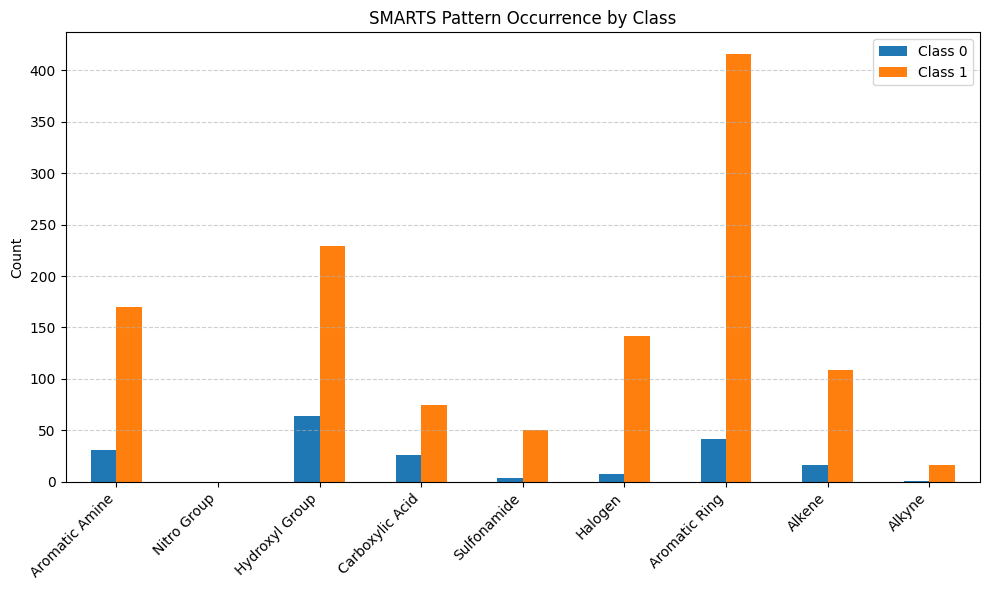

In [19]:
########################################  Analyze SMARTS Substructures ######################################## 

analyzer.summarize_patterns(data_with_flags)

__________

### 8. 📈 Visualize correlation between features  ###

### Feature Correlation Heatmaps

Correlation matrices help identify:
- Redundant features
- Feature interactions
- Potential for multicollinearity

We visualize correlations for numeric descriptors:
```python
EDAVisualizer.compare_correlation_heatmaps(
    [main_df],
    ["Data"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)
```

You can also visualize for multiple dataset by:
```python
EDAVisualizer.compare_correlation_heatmaps(
    dfs=[train_df, valid_df, test_df],
    df_names=["Train", "Validation", "Test"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings']
)


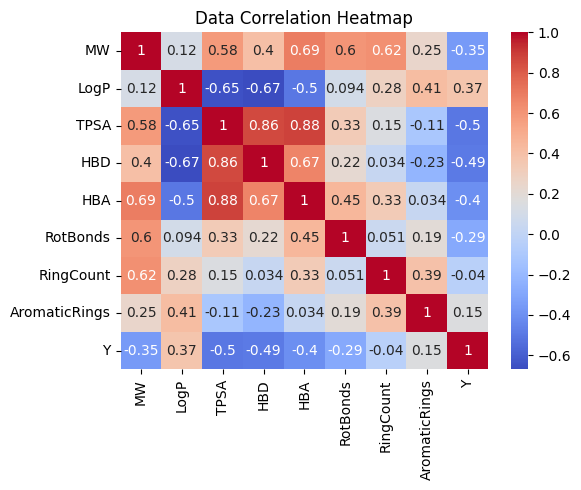

In [20]:
######################################## Show Correlation Heatmaps for Molecular Descriptors ######################################## 

EDAVisualizer.compare_correlation_heatmaps(
    [main_df],
    ["Data"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)


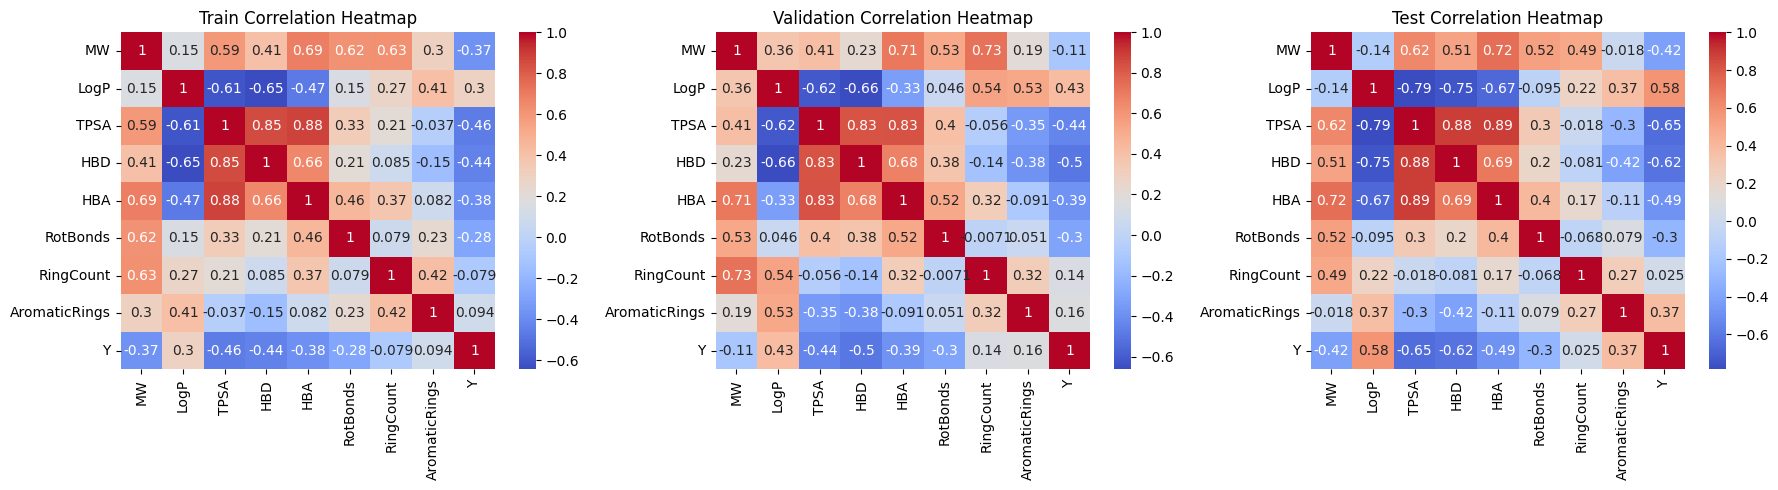

In [21]:
######################################## Check Correlation Heatmaps across Splits ######################################## 

EDAVisualizer.compare_correlation_heatmaps(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    cols=['MW', 'LogP', 'TPSA', 'HBD', 'HBA', 'RotBonds', 'RingCount', 'AromaticRings', 'Y']
)

### Boxplot of Numeric Features Across Splits

Boxplots give another visual cue on median, spread, and outliers per descriptor.

Use:
```python
EDAVisualizer.compare_boxplots(
    dfs=[train_df, valid_df, test_df],
    df_names=['Train', 'Validation', 'Test'],
    col='MW'
)


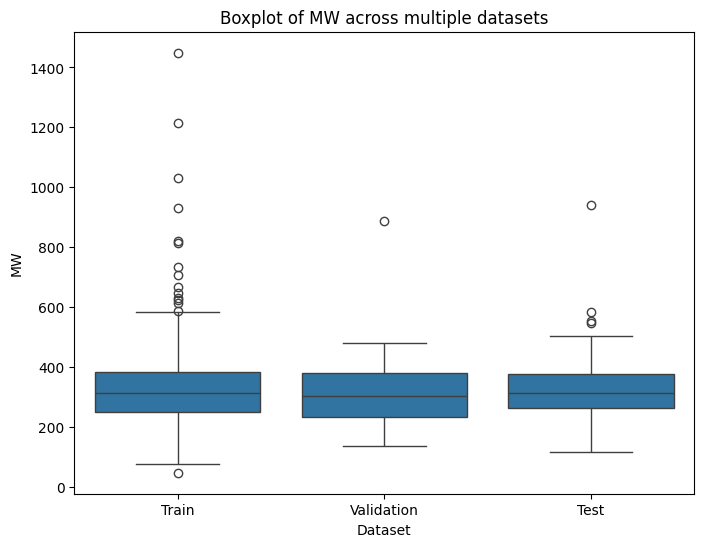

In [22]:
######################################## Compare MW Boxplots ######################################## 

EDAVisualizer.compare_boxplots(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    col='MW'
)

### Compare Feature Distributions (Histogram)

Distribution shifts between train/test datasets can impact model generalization. Here, we compare numeric descriptor histograms.

Example:
```python
EDAVisualizer.compare_numeric_distribution(
    dfs=[train_df, test_df],
    df_names=['Train', 'Test'],
    col='MW'  # or LogP, TPSA, etc.
)


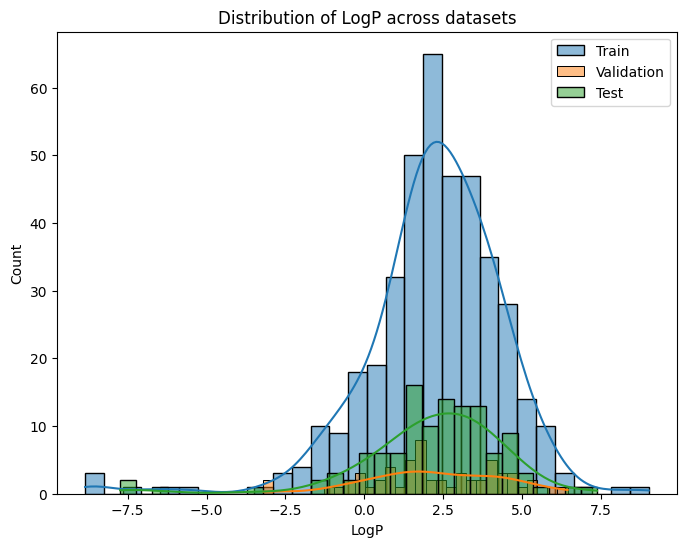

In [23]:
######################################## xxxxx ######################################## 

EDAVisualizer.compare_numeric_distribution(
    [train_df, valid_df, test_df],
    ["Train", "Validation", "Test"],
    col='LogP'
)

_____________

### 9. 🔍 Visual Inspection of Molecules ###

Before building models, it’s helpful to get a “chemical feel” for the data by visualizing molecules per class.

This function:
- Randomly samples `n` molecules per class
- Converts them to RDKit molecules
- Displays them with grid labels

Usage:
```python
EDAVisualizer.draw_samples_by_class(main_df, n=4)



🧪 5 molecules for class 1


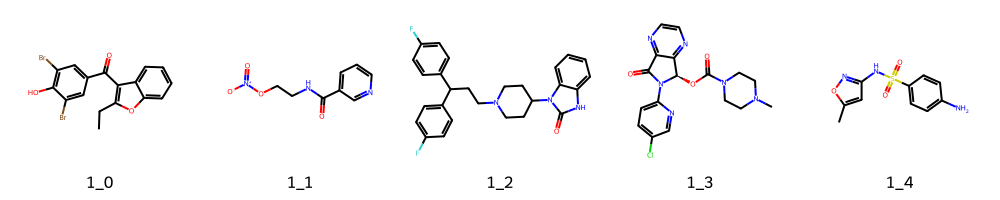

🧪 5 molecules for class 0


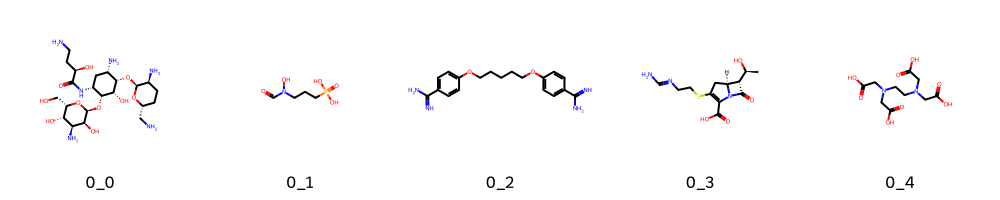

In [24]:
######################################## Visualize "n" samples of molecules per class ########################################
EDAVisualizer.draw_samples_by_class(main_df, n=5)

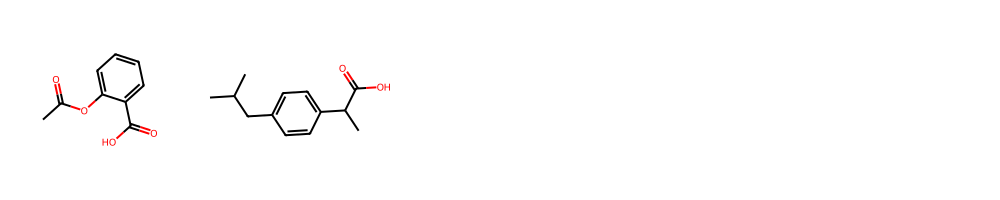

In [25]:
######################################## Draw Sample DRUG SMILE ########################################

EDAVisualizer.draw_molecules([
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # Aspirin
    "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O"  # Ibuprofen
])

________